Using a fake advertising data set, indicating whether or not a particular internet user clicked on an ad.

The dataset contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set_style('whitegrid')

# Read Data


In [2]:
df = pd.read_csv('./data/02b_AdvertisingData.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


# Exploratory Data Analysis



**Age distribution**

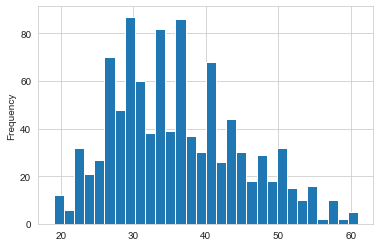

In [6]:
df['Age'].plot(kind='hist',  bins=30)

**Area Income vs Age**

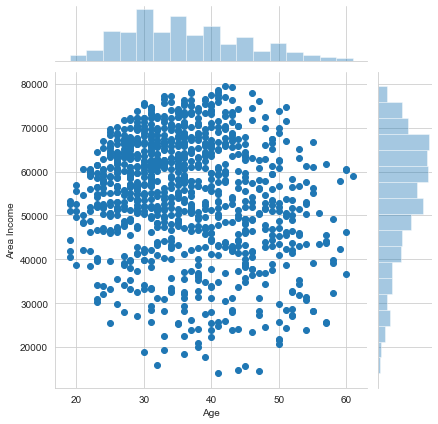

In [7]:
sns.jointplot(x='Age', y='Area Income', data=df)

**Daily Time spent on site vs Age**

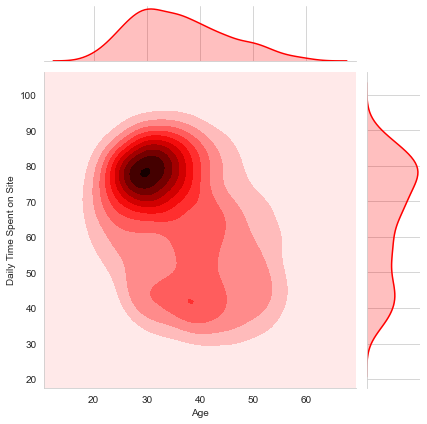

In [8]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=df,  kind='kde',color='r')

**Daily Internet Usage vs Daily Time Spent on Site**

c:\users\alexrpd\appdata\local\programs\python\python38\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


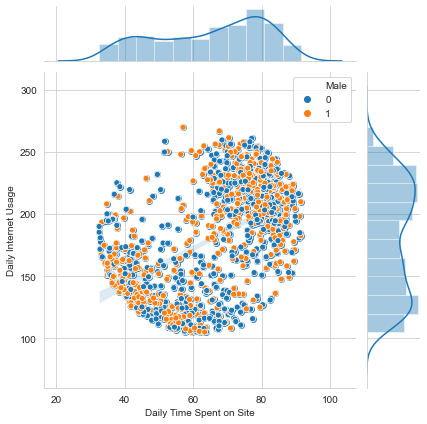

In [9]:
sns.jointplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=df,  kind='reg')
sns.scatterplot(y=df['Daily Internet Usage'], x=df['Daily Time Spent on Site'], hue=df['Male'])

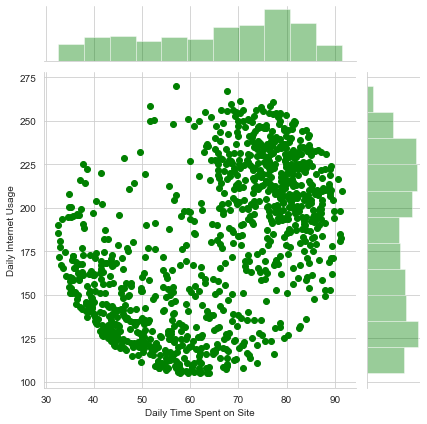

In [10]:
sns.jointplot(y='Daily Internet Usage', x='Daily Time Spent on Site', data=df,  kind='scatter',color='g')

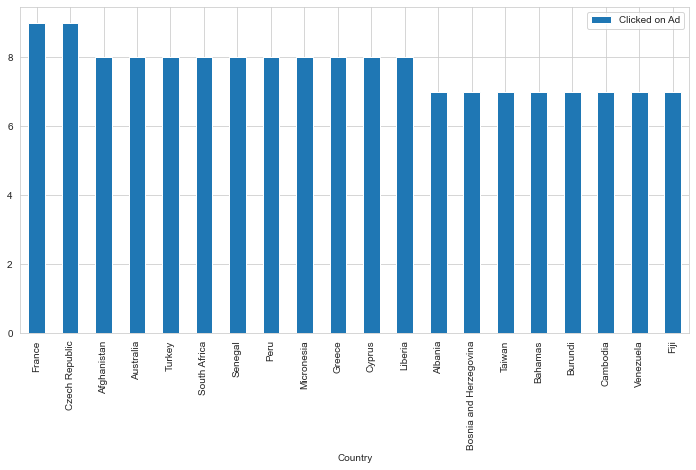

In [11]:
df.groupby('Country').count()[['Clicked on Ad']].sort_values('Clicked on Ad',
                                                             ascending=False).head(20).plot(kind='bar',
                                                                                            figsize=(12,6))

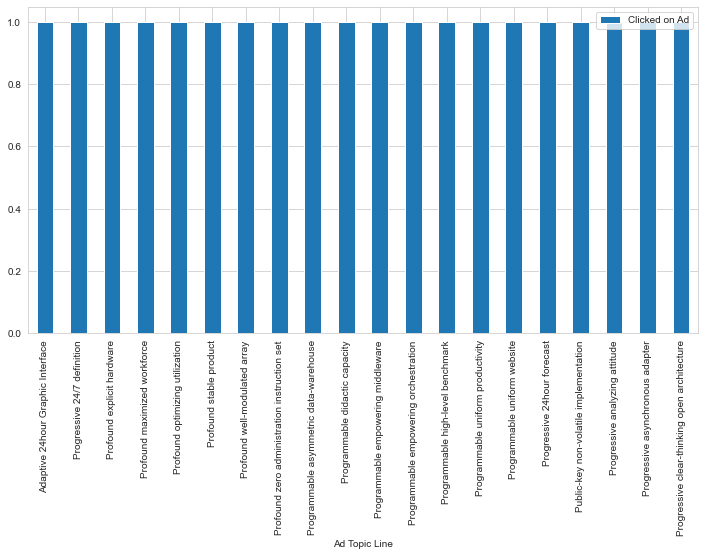

In [12]:
df.groupby('Ad Topic Line').count()[['Clicked on Ad']].sort_values('Clicked on Ad',
                                                             ascending=False).head(20).plot(kind='bar',
                                                                                            figsize=(12,6))

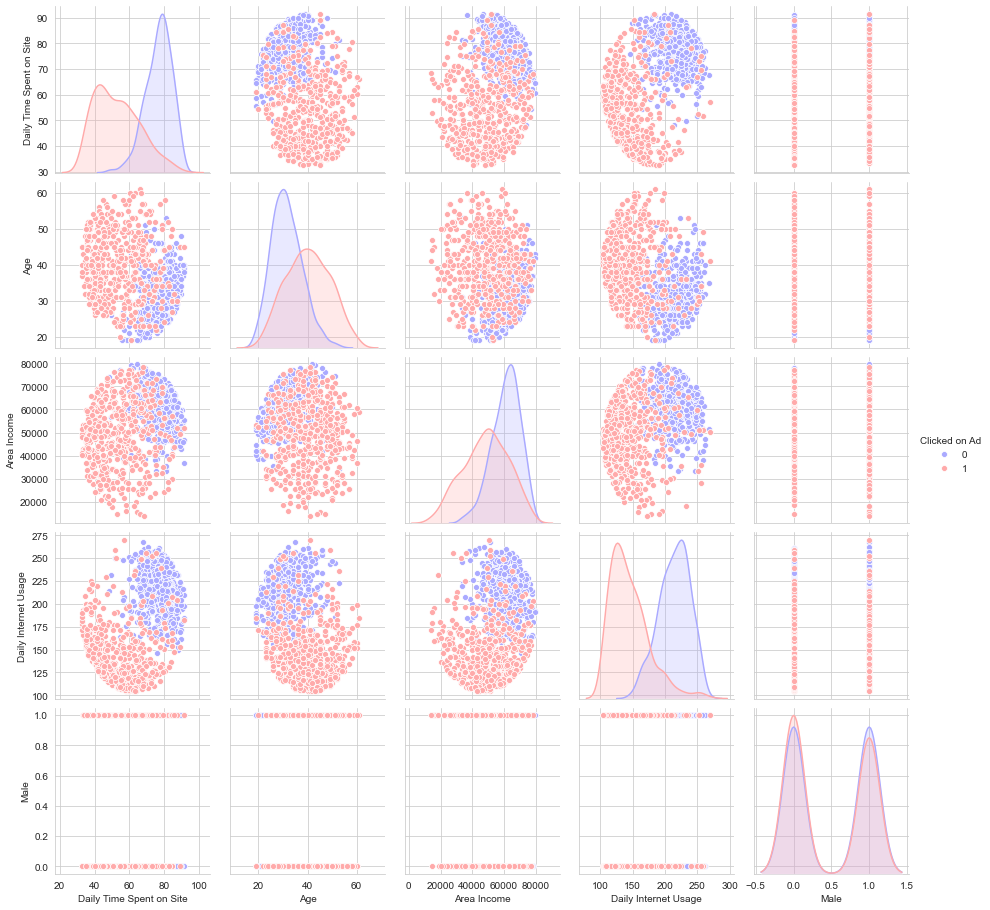

In [13]:
sns.pairplot(df, hue='Clicked on Ad',palette='bwr')

# Logistic Regression


Drop text-based columns that have too many dimensions to be used as predictors

In [14]:
X = df.drop(['Clicked on Ad', 'Timestamp', 'Ad Topic Line', 'Country', 'City'], axis=1)
y = df['Clicked on Ad']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
lg = LogisticRegression(max_iter=1000)

In [18]:
lg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [19]:
pred = lg.predict(X_test)

In [20]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       151
           1       0.92      0.89      0.91       179

    accuracy                           0.90       330
   macro avg       0.90      0.90      0.90       330
weighted avg       0.90      0.90      0.90       330

